In [ ]:
!pip install opendatasets
!pip install pandas
import opendatasets as od
import pandas as pd
import os
import cv2
od.download('http://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/croissant/download')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bhjkl
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri


100%|██████████| 86.8M/86.8M [00:00<00:00, 1.35GB/s]

In [2]:
data_dir = ('/content/brain-tumor-classification-mri/Training')

In [4]:
sub_dir = os.listdir(data_dir)
img_exe = ('.jpg','.jpeg','.png')

for sub in sub_dir:
  path = os.path.join(data_dir,sub)
  img_count = 0
  for filename in os.listdir(path):
    if filename.lower().endswith(img_exe):
      img_count += 1
  print(f'image counts {img_count} and folder {sub}')

image counts 822 and folder meningioma_tumor
image counts 826 and folder glioma_tumor
image counts 827 and folder pituitary_tumor
image counts 395 and folder no_tumor


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug_main = '/content/brain-tumor-classification-mri/Training/no_tumor'

filename = [f for f in os.listdir(aug_main) if f.endswith(img_exe)]

image_to_aug = 420

datagen = ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

i = 0

for files in filename :
  if i >= image_to_aug:
    break
  else:
    img = cv2.imread(os.path.join(aug_main,files))
    img = img.reshape((1,)+img.shape)
    save_dir = aug_main

    for batch in datagen.flow(img,batch_size = 1,save_to_dir = save_dir,save_prefix='aug_',save_format = '.jpg'):
      i+=1
      if i>=image_to_aug:
        break

In [7]:
sub_dir = os.listdir(data_dir)
img_exe = ('.jpg','.jpeg','.png')

for sub in sub_dir:
  path = os.path.join(data_dir,sub)
  img_count = 0
  for filename in os.listdir(path):
    if filename.lower().endswith(img_exe):
      img_count += 1
  print(f'image counts {img_count} and folder {sub}')

image counts 822 and folder meningioma_tumor
image counts 826 and folder glioma_tumor
image counts 827 and folder pituitary_tumor
image counts 801 and folder no_tumor


In [8]:
x =[]
y =[]

data_dir = '/content/brain-tumor-classification-mri/Training'
sub_dir = os.listdir(data_dir)

for sub in sub_dir:
  path = os.path.join(data_dir,sub)
  for filename in os.listdir(path):
    if filename.lower().endswith(img_exe):
      img = cv2.imread(os.path.join(path,filename))
      resize_img = cv2.resize(img,(48,48))
      x.append(resize_img)
      if sub == 'pituitary_tumor':
        y.append(0)
      elif sub == 'meningioma_tumor':
        y.append(1)
      elif sub == 'glioma_tumor':
        y.append(2)
      elif sub == 'no_tumor':
        y.append(3)


In [9]:
import numpy as np
x_np = np.array(x)/255
y_np = np.array(y)

In [10]:
x_np.shape,y_np.shape

((3276, 48, 48, 3), (3276,))

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_np,y_np,random_state=42,test_size=0.2)

In [12]:
import tensorflow as tf

In [13]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(48,48,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(4,activation='softmax')

])

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 691,716 (2.64 MB)

 Trainable params: 691,716 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Epoch 1/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.4007 - loss: 1.2344 - val_accuracy: 0.6829 - val_loss: 0.7087
Epoch 2/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6720 - loss: 0.7541 - val_accuracy: 0.7180 - val_loss: 0.5945
Epoch 3/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7588 - loss: 0.5765 - val_accuracy: 0.7851 - val_loss: 0.5633
Epoch 4/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7895 - loss: 0.5111 - val_accuracy: 0.7561 - val_loss: 0.5555
Epoch 5/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8369 - loss: 0.3922 - val_accuracy: 0.7927 - val_loss: 0.4492
Epoch 6/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8755 - loss: 0.3252 - val_accuracy: 0.8125 - val_loss: 0.4231
Epoch 7/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8891 - loss: 0.2742 - val_accuracy: 0.8659 - val_loss: 0.3513
Epoch 8/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9327 - loss: 0.1979 - val_accuracy: 0.8780 - val_los

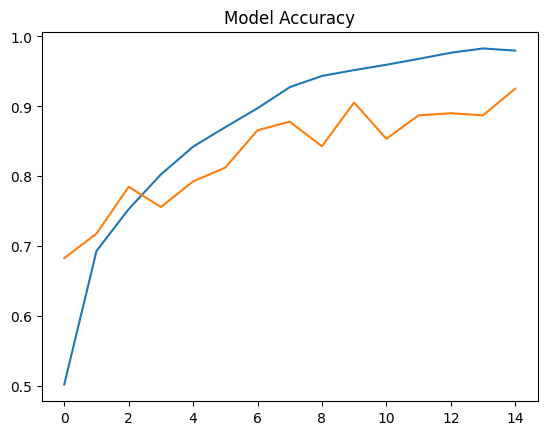

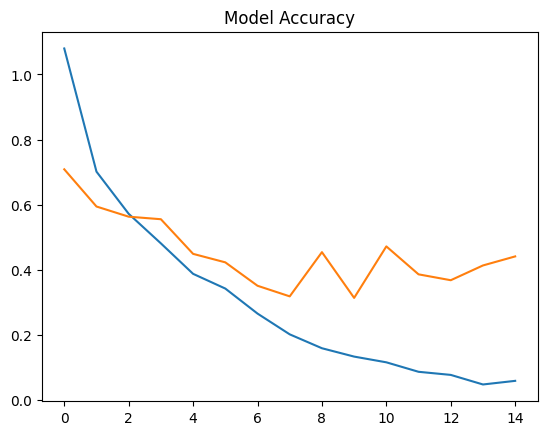

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.show()

In [18]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
print(classification_report(y_test,y_pred_classes,target_names=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']))

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.98      0.97      0.97       163
meningioma_tumor       0.92      0.85      0.88       194
        no_tumor       0.89      0.92      0.90       144
 pituitary_tumor       0.92      0.98      0.95       155

        accuracy                           0.93       656
       macro avg       0.92      0.93      0.93       656
    weighted avg       0.93      0.93      0.92       656

